In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive

Mounted at /gdrive
/gdrive


In [3]:
df=pd.read_csv("/gdrive/My Drive/calisma_ortami/train.csv")

In [4]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df["Age"].mean()

29.69911764705882

In [8]:
df_train=df.copy()

In [9]:
df_train["Age"].fillna(df_train["Age"].mean(),inplace=True)

In [10]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
df_train.drop(columns=["Cabin"],inplace=True)

In [12]:
df_train.drop(columns=["Name"],inplace=True)

In [13]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.000000,1,0,113803,53.1000,S
4,5,0,3,male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,211536,13.0000,S
887,888,1,1,female,19.000000,0,0,112053,30.0000,S
888,889,0,3,female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,male,26.000000,0,0,111369,30.0000,C


In [14]:
df_train.groupby("Embarked").sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,74820,93,317,5134.486471,65,61,10072.2962
Q,32178,30,224,2241.756765,33,13,1022.2543
S,289496,217,1514,18985.670588,368,266,17439.3988


In [15]:
df_train["Embarked"].fillna("S",inplace=True)

In [16]:
df_train.groupby("Ticket").sum()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Ticket,,,,,,,
110152,1523,3,3,79.000000,0,0,259.500
110413,1408,2,3,109.000000,2,4,238.950
110465,587,0,2,76.699118,0,0,104.000
110564,431,1,1,28.000000,0,0,26.550
110813,367,1,1,60.000000,1,0,75.250
...,...,...,...,...,...,...,...
W./C. 6608,1409,0,12,94.000000,6,10,137.500
W./C. 6609,236,0,3,29.699118,0,0,7.550
W.E.P. 5734,93,0,1,46.000000,1,0,61.175


In [17]:
df_train.drop(columns=["Ticket"],inplace=True)

In [18]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


In [19]:
from sklearn.preprocessing import LabelEncoder

lbe=LabelEncoder()

In [20]:
df_train["new_sex"]=lbe.fit_transform(df["Sex"])

In [21]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,new_sex
0,1,0,3,male,22.000000,1,0,7.2500,S,1
1,2,1,1,female,38.000000,1,0,71.2833,C,0
2,3,1,3,female,26.000000,0,0,7.9250,S,0
3,4,1,1,female,35.000000,1,0,53.1000,S,0
4,5,0,3,male,35.000000,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S,1
887,888,1,1,female,19.000000,0,0,30.0000,S,0
888,889,0,3,female,29.699118,1,2,23.4500,S,0
889,890,1,1,male,26.000000,0,0,30.0000,C,1


In [22]:
df_train.drop(columns=["Sex"],inplace=True)

In [23]:
df_train["Sex"]=df_train["new_sex"]

In [24]:
df_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,new_sex,Sex
0,1,0,3,22.000000,1,0,7.2500,S,1,1
1,2,1,1,38.000000,1,0,71.2833,C,0,0
2,3,1,3,26.000000,0,0,7.9250,S,0,0
3,4,1,1,35.000000,1,0,53.1000,S,0,0
4,5,0,3,35.000000,0,0,8.0500,S,1,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,S,1,1
887,888,1,1,19.000000,0,0,30.0000,S,0,0
888,889,0,3,29.699118,1,2,23.4500,S,0,0
889,890,1,1,26.000000,0,0,30.0000,C,1,1


In [25]:
df_train.drop(columns=["new_sex"],inplace=True)

In [26]:
df_train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
0,1,0,3,22.000000,1,0,7.2500,S,1
1,2,1,1,38.000000,1,0,71.2833,C,0
2,3,1,3,26.000000,0,0,7.9250,S,0
3,4,1,1,35.000000,1,0,53.1000,S,0
4,5,0,3,35.000000,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,S,1
887,888,1,1,19.000000,0,0,30.0000,S,0
888,889,0,3,29.699118,1,2,23.4500,S,0
889,890,1,1,26.000000,0,0,30.0000,C,1


In [27]:
df_train=pd.get_dummies(df_train,columns=["Embarked"],prefix=["Embarked"])

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

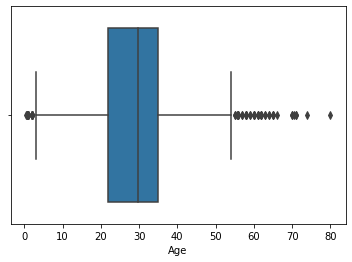

In [29]:
df_age=df_train["Age"]
sns.boxplot(x=df_age)

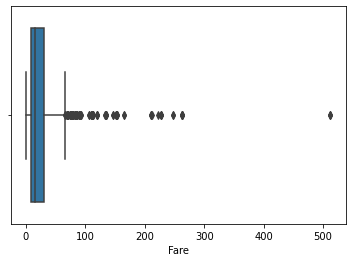

In [30]:
df_fare=df_train["Fare"]
sns.boxplot(x=df_fare);

In [31]:
df_train.drop(columns=["PassengerId"],inplace=True)

In [32]:
df_train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.2500,1,0,0,1
1,1,1,38.000000,1,0,71.2833,0,1,0,0
2,1,3,26.000000,0,0,7.9250,0,0,0,1
3,1,1,35.000000,1,0,53.1000,0,0,0,1
4,0,3,35.000000,0,0,8.0500,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.0000,1,0,0,1
887,1,1,19.000000,0,0,30.0000,0,0,0,1
888,0,3,29.699118,1,2,23.4500,0,0,0,1
889,1,1,26.000000,0,0,30.0000,1,1,0,0


In [33]:
q1=df_age.quantile(0.25)
q3=df_age.quantile(0.75)
iqr=q3-q1

In [34]:
q1

22.0

In [35]:
q3

35.0

In [36]:
alt_sinir=q1-1.5*iqr
ust_sinir=q3+1.5*iqr

In [37]:
alt_sinir

2.5

In [38]:
ust_sinir

54.5

In [39]:
(df_age<alt_sinir) | (df_age>ust_sinir)

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [40]:
aykiri_tf=(df_age<alt_sinir) | (df_age>ust_sinir)

In [41]:
aykiri_tf

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [42]:
df_train[aykiri_tf]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_C,Embarked_Q,Embarked_S
7,0,3,2.00,3,1,21.0750,1,0,0,1
11,1,1,58.00,0,0,26.5500,0,0,0,1
15,1,2,55.00,0,0,16.0000,0,0,0,1
16,0,3,2.00,4,1,29.1250,1,0,1,0
33,0,2,66.00,0,0,10.5000,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
827,1,2,1.00,0,2,37.0042,1,1,0,0
829,1,1,62.00,0,0,80.0000,0,0,0,1
831,1,2,0.83,1,1,18.7500,1,0,0,1
851,0,3,74.00,0,0,7.7750,1,0,0,1


In [43]:
q1=df_fare.quantile(0.25)
q3=df_fare.quantile(0.75)
iqr=q3-q1

In [44]:
q1

7.9104

In [45]:
q3

31.0

In [46]:
alt_sinir=q1-1.5*iqr
ust_sinir=q3+1.5*iqr

In [47]:
alt_sinir

-26.724

In [48]:
ust_sinir

65.6344

In [49]:
aykirifare_tf=(df_fare<alt_sinir) | (df_fare>ust_sinir)

In [50]:
df_train[aykirifare_tf]

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_C,Embarked_Q,Embarked_S
1,1,1,38.000000,1,0,71.2833,0,1,0,0
27,0,1,19.000000,3,2,263.0000,1,0,0,1
31,1,1,29.699118,1,0,146.5208,0,1,0,0
34,0,1,28.000000,1,0,82.1708,1,1,0,0
52,1,1,49.000000,1,0,76.7292,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
846,0,3,29.699118,8,2,69.5500,1,0,0,1
849,1,1,29.699118,1,0,89.1042,0,1,0,0
856,1,1,45.000000,1,1,164.8667,0,0,0,1
863,0,3,29.699118,8,2,69.5500,0,0,0,1


In [51]:
df_age[aykiri_tf]=df_age.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
df_fare[aykirifare_tf]=df_fare.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


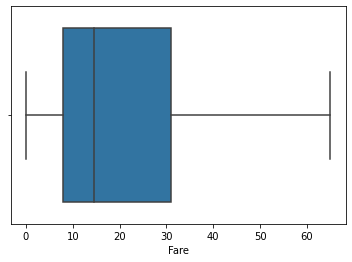

In [53]:
df_fare=df_train["Fare"]
sns.boxplot(x=df_fare);

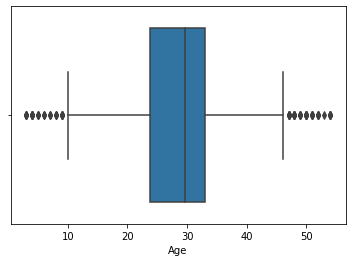

In [54]:
df_age=df_train["Age"]
sns.boxplot(x=df_age)

In [55]:
df_train

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.000000,1,0,7.250000,1,0,0,1
1,1,1,38.000000,1,0,32.204208,0,1,0,0
2,1,3,26.000000,0,0,7.925000,0,0,0,1
3,1,1,35.000000,1,0,53.100000,0,0,0,1
4,0,3,35.000000,0,0,8.050000,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.000000,0,0,13.000000,1,0,0,1
887,1,1,19.000000,0,0,30.000000,0,0,0,1
888,0,3,29.699118,1,2,23.450000,0,0,0,1
889,1,1,26.000000,0,0,30.000000,1,1,0,0


In [56]:
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score,mean_squared_error,r2_score,roc_auc_score,roc_curve,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [189]:
y=df_train["Survived"]
X=df_train.drop(["Survived"],axis=1)
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.15,random_state=42)

In [58]:
from lightgbm import LGBMClassifier

In [221]:
fit=DecisionTreeClassifier().fit(X,y)

In [222]:
df_test=pd.read_csv("/gdrive/My Drive/calisma_ortami/test.csv")

In [243]:
df_test1=pd.read_csv("/gdrive/My Drive/calisma_ortami/test.csv")

In [223]:
df_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [224]:
sonra_eklencek=df_test["PassengerId"]

In [225]:
df_test.drop(columns=["Name","Ticket","Cabin"],inplace=True)

In [226]:
df_test.drop(columns=["PassengerId"],inplace=True)

In [227]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,NaN,0,0,8.0500,S


In [228]:
df_test["new_sex"]=lbe.fit_transform(df_test["Sex"])

In [229]:
df_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,new_sex
0,3,male,34.5,0,0,7.8292,Q,1
1,3,female,47.0,1,0,7.0000,S,0
2,2,male,62.0,0,0,9.6875,Q,1
3,3,male,27.0,0,0,8.6625,S,1
4,3,female,22.0,1,1,12.2875,S,0
...,...,...,...,...,...,...,...,...
413,3,male,NaN,0,0,8.0500,S,1
414,1,female,39.0,0,0,108.9000,C,0
415,3,male,38.5,0,0,7.2500,S,1
416,3,male,NaN,0,0,8.0500,S,1


In [230]:
df_test.drop(columns=["Sex"],inplace=True)

In [231]:
df_test["Sex"]=df_test["new_sex"]

In [232]:
df_test.drop(columns=["new_sex"],inplace=True)

In [233]:
df_test

,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex
0,3,34.5,0,0,7.8292,Q,1
1,3,47.0,1,0,7.0000,S,0
2,2,62.0,0,0,9.6875,Q,1
3,3,27.0,0,0,8.6625,S,1
4,3,22.0,1,1,12.2875,S,0
...,...,...,...,...,...,...,...
413,3,NaN,0,0,8.0500,S,1
414,1,39.0,0,0,108.9000,C,0
415,3,38.5,0,0,7.2500,S,1
416,3,NaN,0,0,8.0500,S,1


In [234]:
df_test=pd.get_dummies(df_test,columns=["Embarked"],prefix=["Embarked"])

In [235]:
df_test.isnull().sum()

Pclass         0
Age           86
SibSp          0
Parch          0
Fare           1
Sex            0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

In [236]:
df_test["Age"].fillna(df_test["Age"].mean(),inplace=True)

In [237]:
df_test["Fare"].fillna(df_test["Fare"].mean(),inplace=True)

In [238]:
X_test_test=df_test

In [239]:
y_pred_test=fit.predict(X_test_test)

In [240]:
df_test.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex           0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [241]:
y_pred_test

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [182]:
y_survived=pd.DataFrame(y_pred_test)

In [114]:
y_survived

pandas.core.frame.DataFrame

In [244]:
submission5 = pd.DataFrame({'PassengerId':df_test1['PassengerId'],'Survived':y_pred_test})

In [245]:
submission5.to_csv("/gdrive/My Drive/Submission6.csv",index=False)

In [159]:
df_submission3=pd.concat([sonra_eklencek,y_survived],axis=1)

In [160]:
df_submission3.to_csv("/gdrive/My Drive/Submission3.csv",index=False)

In [128]:
df_submission.set_index("PassengerId",inplace=True)

In [154]:
df_submission.set_axis

TypeError: ignored

In [131]:
df_submission.to_csv(path_or_buf="/gdrive/My Drive/Submission.csv",index=False)

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [188]:
accuracy_score(y_survived,y_survived)

1.0